In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [168]:
corpus = pd.read_csv('drug200.csv')

[23, 16, 16, 54, 91]


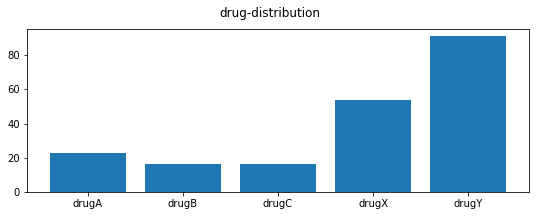

In [169]:
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
instances = [0, 0, 0, 0, 0]
for row in corpus.values:
    for i in range(len(classes)):
        if row[5] == classes[i]:
            instances[i] +=1
            
print(instances)
graph = plt.figure(figsize=(9,3))
plt.bar(classes,instances)
plt.suptitle('drug-distribution')
plt.show()
graph.savefig('drug-distribution.pdf', dpi=200)

In [170]:
numerical_corpus = pd.get_dummies(corpus, columns=['Sex'])

numerical_corpus.BP = pd.Categorical(numerical_corpus.BP, categories = ['LOW', 'NORMAL', 'HIGH'], ordered=True)
numerical_corpus.BP = numerical_corpus.BP.cat.codes

numerical_corpus.Cholesterol = pd.Categorical(numerical_corpus.Cholesterol,categories = ['NORMAL', 'HIGH'], ordered=True)
numerical_corpus.Cholesterol = numerical_corpus.Cholesterol.cat.codes

print(numerical_corpus)

     Age  BP  Cholesterol  Na_to_K   Drug  Sex_F  Sex_M
0     23   2            1   25.355  drugY      1      0
1     47   0            1   13.093  drugC      0      1
2     47   0            1   10.114  drugC      0      1
3     28   1            1    7.798  drugX      1      0
4     61   0            1   18.043  drugY      1      0
..   ...  ..          ...      ...    ...    ...    ...
195   56   0            1   11.567  drugC      1      0
196   16   0            1   12.006  drugC      0      1
197   52   1            1    9.894  drugX      0      1
198   23   1            0   14.020  drugX      0      1
199   40   0            0   11.349  drugX      1      0

[200 rows x 7 columns]


In [171]:
y = numerical_corpus.Drug
x = numerical_corpus.drop('Drug',axis=1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)


In [174]:
nb = GaussianNB()
nb.fit(X_train,y_train)

bdt = DecisionTreeClassifier()
bdt.fit(X_train,y_train)

params = {
    'criterion': ['gini'], 
    'max_depth': [10, 20], 
    'min_samples_split': [10,20,30]
}

tdt = GridSearchCV(bdt,params)

per = Perceptron()
per.fit(X_train,y_train)

bmlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='logistic', 
    solver='sgd'
)
bmlp.fit(X_train,y_train)

params2 = {
    'activation': ['sigmoid', 'tanh', 'relu', 'identity'], 
    'hidden_layer_sizes':(40,60), 
    'solver': ['adam', 'sgd']
}
tmlp = GridSearchCV(bmlp,params)


C:\Users\etpha\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
